# ASTRO 361 - Lab 4
## Student Code

### Jimmy Lechtner - jameslec

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from scipy.optimize import curve_fit 
from astropy.io import fits
import numpy as np
import scipy as sp

## Part A - Gain

In [2]:
bias = []
dark = []
lamp60 = []
lamp121 = []
lamp242 = []
for i in range(1,11):
    bias.append(fits.getdata("/Users/jameslec/Desktop/lab4_ccd/data/Bias-" +
                             "0"*(4-len(str(i))) + str(i) + ".fit" , ext=0).astype(np.int))
    dark.append(fits.getdata("/Users/jameslec/Desktop/lab4_ccd/data/Dark-" +
                             "0"*(4-len(str(i))) + str(i) + ".fit" , ext=0).astype(np.int))
    lamp60.append(fits.getdata("/Users/jameslec/Desktop/lab4_ccd/data/Lamp60-" +
                               "0"*(4-len(str(i))) + str(i) + ".fit" , ext=0).astype(np.int))
    lamp121.append(fits.getdata("/Users/jameslec/Desktop/lab4_ccd/data/Lamp121-" +
                                "0"*(4-len(str(i))) + str(i) + ".fit" , ext=0).astype(np.int))
    lamp242.append(fits.getdata("/Users/jameslec/Desktop/lab4_ccd/data/Lamp242-" +
                                "0"*(4-len(str(i))) + str(i) + ".fit" , ext=0).astype(np.int))
bias = np.asarray(bias)
dark = np.asarray(dark)
lamp60 = np.asarray(lamp60)
lamp121 = np.asarray(lamp121)
lamp242 = np.asarray(lamp242)

In [3]:
#summation = bias[0]
#print("Std bias[0]:", np.std(bias[0]))
#for i in range(1, 10):
#    print("Std bias[" + str(i) + "]:", np.std(bias[i]))
#    summation = summation + bias[i]
#summation = summation / 10
#std = np.std(summation)
#print(std)



bias_mean = np.mean(bias, axis=0)
dark_mean = np.mean(dark, axis=0)
lamp60_mean = np.mean(lamp60, axis=0)
lamp121_mean = np.mean(lamp121, axis=0)
lamp242_mean = np.mean(lamp242, axis=0)
print("bias:", np.std(bias_mean))
print("dark:", np.std(dark_mean))
print("lamp60:", np.std(lamp60_mean))
print("lamp121:", np.std(lamp121_mean))
print("lamp242:", np.std(lamp242_mean))

bias: 7.473245702144156
dark: 7.676521800523124
lamp60: 55.09755715113382
lamp121: 258.72559407418777
lamp242: 766.5043318589882


In [4]:
dark_corrected = dark - bias_mean
lamp60_corrected = lamp60 - bias_mean
lamp121_corrected = lamp121 - bias_mean
lamp242_corrected = lamp242 - bias_mean

dark_corrected_mean = np.mean(dark_corrected)
dark_corrected_var = np.mean(np.var(dark_corrected, axis=0))

lamp60_corrected_mean = np.mean(lamp60_corrected)
lamp60_corrected_var = np.mean(np.var(lamp60_corrected, axis=0))

lamp121_corrected_mean = np.mean(lamp121_corrected)
lamp121_corrected_var = np.mean(np.var(lamp121_corrected, axis=0))

lamp242_corrected_mean = np.mean(lamp242_corrected)
lamp242_corrected_var = np.mean(np.var(lamp242_corrected, axis=0))

lamp_means = [lamp60_corrected_mean, lamp121_corrected_mean, lamp242_corrected_mean]
lamp_vars = [lamp60_corrected_var, lamp121_corrected_var, lamp242_corrected_var]

[1926.0478603086494, 9371.133222238283, 27898.666591805406]
[4067.5900097642957, 19169.588255619637, 56629.258027756914]


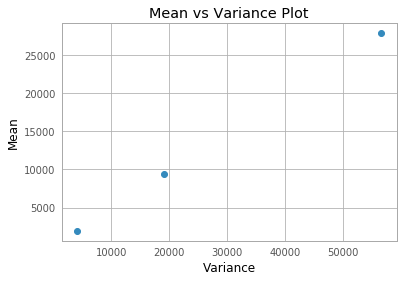

In [5]:
print(lamp_means)
print(lamp_vars)
plt.title("Mean vs Variance Plot")
plt.xlabel("Variance")
plt.ylabel("Mean")
plt.scatter(lamp_vars, lamp_means)

### Curve Fit Attempt

In [6]:
def func(x,a,b):
    return a*x + b

a=0.49422443888088546, b=-92.03233002052166


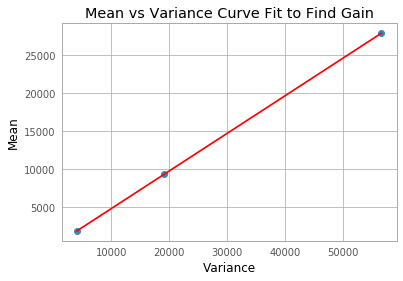

Gain = a = 0.49422443888088546


In [7]:
xvals = lamp_vars
yvals = lamp_means
coeffs, fiterr = curve_fit(func, xvals, yvals, p0=(0.5,0.0))
print ("a=%s, b=%s" % (coeffs[0], coeffs[1]))
plt.scatter(lamp_vars, lamp_means)
plt.plot(xvals,func(np.array(xvals),*coeffs),'r')
plt.title("Mean vs Variance Curve Fit to Find Gain")
plt.xlabel("Variance")
plt.ylabel("Mean")
plt.show()

print("Gain = a =", coeffs[0])
#xmin,xmax = (0, 60000)
#N = 5000
#a = 1
#b = 0
#xvals = np.random.uniform(xmin, xmax, N)
#yvals0 = line(a, xvals, b)

In [8]:
read_noise = (coeffs[0]*bias.std(axis=0).mean())
print("Read Noise =", read_noise)

Read Noise = 9.605652930674532


<br/><br/><br/><br/><br/>
## Part 2 - Dark Current

In [21]:
bias = []
for i in range(1,21):
    bias.append(fits.getdata("/Users/jameslec/Desktop/lab4_ccd/data2/Bias2-" +
                             "0"*(4-len(str(i))) + str(i) + ".fit" , ext=0).astype(np.int))
# CCD1: Temp ccd1 = 8.9C, time = 300s
# CCd2: Temp ccd2 = 4.6C, time = 450s
ccd1 = fits.getdata("/Users/jameslec/Desktop/lab4_ccd/data2/ccd1.fit")
ccd2 = fits.getdata("/Users/jameslec/Desktop/lab4_ccd/data2/ccd2.fit")
bias_mean = np.mean(bias, axis=0)
print(bias_mean)
print(ccd1)
print(ccd2)

[[973.2  967.75 978.55 ... 973.45 970.3  975.3 ]
 [975.2  964.95 962.05 ... 966.05 974.25 968.6 ]
 [964.7  965.85 976.45 ... 963.25 967.95 967.2 ]
 ...
 [981.75 979.   975.8  ... 973.25 980.75 975.15]
 [975.1  980.9  974.55 ... 970.4  981.5  977.6 ]
 [985.8  979.95 978.3  ... 973.05 966.45 983.9 ]]
[[1065 1029 1022 ... 1021 1018 1011]
 [1095 1049 1074 ...  982 1029 1035]
 [1059 1038 1039 ... 1018  988 1027]
 ...
 [1025 1052 1030 ... 1010 1072 1053]
 [ 954 1059 1026 ... 1044  967 1028]
 [1020 1034 1005 ... 1019 1033 1025]]
[[1018  994 1057 ... 1044 1010 1028]
 [1120 1056 1041 ...  976 1032 1044]
 [1032 1094 1031 ... 1089 1005 1034]
 ...
 [1009 1024  984 ... 1058 1107 1074]
 [1006 1051 1021 ... 1046 1009 1025]
 [1064 1046 1016 ... 1051 1031 1028]]


In [22]:
print("bias:", np.std(bias_mean))

ccd1_corrected = ccd1 - bias_mean
ccd1_corrected_median = np.median(ccd1_corrected)

ccd2_corrected = ccd2 - bias_mean
ccd2_corrected_median = np.median(ccd2_corrected)

print("ccd1_corrected_median:", ccd1_corrected_median)
print("ccd2_corrected_median:", ccd2_corrected_median)

bias: 5.873345372617045
ccd1_corrected_median: 68.0
ccd2_corrected_median: 76.70000000000005


In [35]:
# Other Groups Data
xvals = [] # Temperature (K)
yvals = [] # Dark Current (median counts / seconds)

# Order by temperature (xvals.append()) to stop from being zig-zaggity

xvals.append(277.6)
yvals.append(ccd2_corrected_median / 450.)

groupB2 = fits.getdata("/Users/jameslec/Desktop/lab4_ccd/data2/GroupBDarkT6exp300.fit")
groupB2_median = np.median(groupB2 - bias_mean)
xvals.append(279)
yvals.append(groupB2_median / 300.)

groupDark2 = fits.getdata("/Users/jameslec/Desktop/lab4_ccd/data2/DarkT7.1Exp400.fit")
groupDark2_median = np.median(groupDark2 - bias_mean)
xvals.append(280.1)
yvals.append(groupDark2_median / 400.)

xvals.append(281.9)
yvals.append(ccd1_corrected_median / 300.)

groupB1 = fits.getdata("/Users/jameslec/Desktop/lab4_ccd/data2/GroupBDarkT9exp600.fit")
groupB1_median = np.median(groupB1 - bias_mean)
xvals.append(282)
yvals.append(groupB1_median / 600.)

groupDark1 = fits.getdata("/Users/jameslec/Desktop/lab4_ccd/data2/DarkT9.4Exp300.fit")
groupDark1_median = np.median(groupDark1 - bias_mean)
xvals.append(282.4)
yvals.append(groupDark1_median / 300.)

In [36]:
K = 8.617e-5 # ev/K
def func (x,A,E):
    return A*x**(1.5)*np.exp(-E/(2*8.617e-5*x))

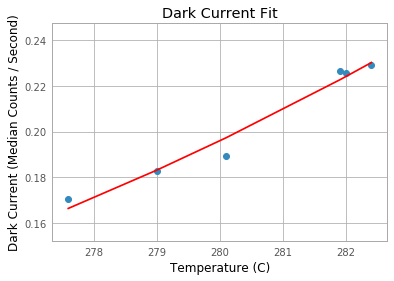

A = 1514.6863547178216
Eg = 0.8398692816136993
Expected Eg ~ 1.11


In [37]:
coeffs, fiterr = curve_fit(func, xvals, yvals, p0=(1300,.8))
plt.scatter(xvals, yvals)
plt.plot(xvals,func(np.array(xvals),*coeffs),'r')
plt.title("Dark Current Fit")
plt.xlabel("Temperature (C)")
plt.ylabel("Dark Current (Median Counts / Second)")
plt.show()
print("A =", coeffs[0])
print("Eg =", coeffs[1])
print("Expected Eg ~ 1.11")